Implement Bag of Words (BoW)

We'll do the following:

1. Define input documents
2. Preprocess each document (lowercase, remove punctuation, split)
3. Build the vocabulary
4. Create a frequency vector for each document
5. Assemble the matrix

---

## 📘 Step-by-Step Manual Bag of Words (BoW)

### 🧾 Step 1: Define Documents

```python
documents = [
    "I love machine learning",
    "Machine learning is amazing",
    "I love coding in Python"
]
```

We have 3 short documents.

---

### ✂️ Step 2: Preprocessing

We'll:

* Convert to lowercase
* Remove punctuation
* Tokenize into words (split by space)

```python
def preprocess(text):
    text = text.lower()  # convert to lowercase
    # Remove punctuation manually (no regex for full manual control)
    punctuation = ['.', ',', '!', '?']
    for p in punctuation:
        text = text.replace(p, '')
    words = text.split()  # tokenize by spaces
    return words

# Apply preprocessing
tokenized_docs = [preprocess(doc) for doc in documents]

# Show tokens
for i, doc in enumerate(tokenized_docs):
    print(f"Tokens in Document {i+1}:", doc)
```

### Output:

```
Tokens in Document 1: ['i', 'love', 'machine', 'learning']
Tokens in Document 2: ['machine', 'learning', 'is', 'amazing']
Tokens in Document 3: ['i', 'love', 'coding', 'in', 'python']
```

---

### 🧠 Step 3: Build Vocabulary (Unique Words)

We go through each tokenized document and collect unique words.

```python
# Flatten all words into one list
all_words = []
for doc in tokenized_docs:
    all_words.extend(doc)

# Get unique words (manual way)
vocab = []
for word in all_words:
    if word not in vocab:
        vocab.append(word)

# Show vocabulary
print("Vocabulary:", vocab)
```

### Output:

```
Vocabulary: ['i', 'love', 'machine', 'learning', 'is', 'amazing', 'coding', 'in', 'python']
```

There are **9 unique words**, so the final matrix will have 9 columns.

---

### 🧮 Step 4: Create Frequency Vectors for Each Document

We’ll create a vector for each document:

* Length = number of vocab words (9)
* Each position corresponds to word count

```python
bow_vectors = []

for doc in tokenized_docs:
    vector = []
    for word in vocab:
        count = doc.count(word)  # count word in current doc
        vector.append(count)
    bow_vectors.append(vector)

# Show all vectors
for i, vec in enumerate(bow_vectors):
    print(f"BoW Vector for Document {i+1}:", vec)
```

### Output:

```
BoW Vector for Document 1: [1, 1, 1, 1, 0, 0, 0, 0, 0]
BoW Vector for Document 2: [0, 0, 1, 1, 1, 1, 0, 0, 0]
BoW Vector for Document 3: [1, 1, 0, 0, 0, 0, 1, 1, 1]
```

---

### 📊 Step 5: Create BoW Matrix

Let’s display this as a nice table using only Python lists:

```python
# Column headers
print("Vocabulary:", vocab)

# Table rows
for i, vec in enumerate(bow_vectors):
    print(f"Doc{i+1}: {vec}")
```

### Output:

```
Vocabulary: ['i', 'love', 'machine', 'learning', 'is', 'amazing', 'coding', 'in', 'python']
Doc1: [1, 1, 1, 1, 0, 0, 0, 0, 0]
Doc2: [0, 0, 1, 1, 1, 1, 0, 0, 0]
Doc3: [1, 1, 0, 0, 0, 0, 1, 1, 1]
```

---

## ✅ Final Manual BoW Table:

| Doc  | i | love | machine | learning | is | amazing | coding | in | python |
| ---- | - | ---- | ------- | -------- | -- | ------- | ------ | -- | ------ |
| Doc1 | 1 | 1    | 1       | 1        | 0  | 0       | 0      | 0  | 0      |
| Doc2 | 0 | 0    | 1       | 1        | 1  | 1       | 0      | 0  | 0      |
| Doc3 | 1 | 1    | 0       | 0        | 0  | 0       | 1      | 1  | 1      |

---

## 🔁 Recap of Manual Steps

1. **Lowercase + Clean** the text
2. **Tokenize** into words
3. **Build vocabulary** (unique words)
4. **For each document**, count how many times each vocab word appears
5. Assemble into a final matrix




# TF IDF



# **Step 1: Four Indian Sentiment Sentences**

Here are four sentences (positive, negative, neutral, mixed):

1. **Positive:**
   `"The food at the wedding was absolutely delicious."`

2. **Negative:**
   `"The traffic in Mumbai made me very angry."`

3. **Neutral:**
   `"My train to Delhi is scheduled at 6 AM."`

4. **Mixed:**
   `"The festival was colorful but the crowd was too much."`

---

# **Step 2: Manual TF-IDF Calculation**

Let’s **simplify** the process:

* Remove stopwords (like "the", "at", "was", etc.).
* Tokenize (split into words).
* Calculate **TF** (Term Frequency) and **IDF** (Inverse Document Frequency).
* Get **TF-IDF** score.

Let's **choose three words to demonstrate:**
Let’s pick: `food`, `festival`, and `crowd`.

---

## **A. Prepare the Data**

| Doc | Sentence                                              | Tokens after stopwords removal       |
| --- | ----------------------------------------------------- | ------------------------------------ |
| 1   | The food at the wedding was absolutely delicious.     | food, wedding, absolutely, delicious |
| 2   | The traffic in Mumbai made me very angry.             | traffic, Mumbai, made, angry         |
| 3   | My train to Delhi is scheduled at 6 AM.               | train, Delhi, scheduled, 6, AM       |
| 4   | The festival was colorful but the crowd was too much. | festival, colorful, crowd, much      |

Let’s use only **food, festival, crowd** for demonstration.

---

## **B. Term Frequency (TF)**

How many times does the word appear in each doc?

| Word     | Doc 1 | Doc 2 | Doc 3 | Doc 4 |
| -------- | ----- | ----- | ----- | ----- |
| food     | 1     | 0     | 0     | 0     |
| festival | 0     | 0     | 0     | 1     |
| crowd    | 0     | 0     | 0     | 1     |

Let’s use **relative TF** (word count / total words in doc):

* **Doc 1**: 4 words (food, wedding, absolutely, delicious)
* **Doc 2**: 4 words (traffic, Mumbai, made, angry)
* **Doc 3**: 5 words (train, Delhi, scheduled, 6, AM)
* **Doc 4**: 4 words (festival, colorful, crowd, much)

TF Table:

| Word     | Doc 1    | Doc 2 | Doc 3 | Doc 4    |
| -------- | -------- | ----- | ----- | -------- |
| food     | 1/4=0.25 | 0     | 0     | 0        |
| festival | 0        | 0     | 0     | 1/4=0.25 |
| crowd    | 0        | 0     | 0     | 1/4=0.25 |

---

## **C. Inverse Document Frequency (IDF)**

Formula:

$$
IDF = \log_{10}\left(\frac{N}{df}\right)
$$

Where:

* $N =$ total number of documents = 4
* $df =$ number of documents containing the word

For our words:

* **food:** appears in 1 doc → $df = 1$
* **festival:** 1 doc → $df = 1$
* **crowd:** 1 doc → $df = 1$

So:

$$
IDF = \log_{10}\left(\frac{4}{1}\right) = \log_{10}(4) \approx 0.602
$$

---

## **D. TF-IDF Calculation**

$$
TFIDF = TF \times IDF
$$

| Word     | Doc 1                | Doc 2 | Doc 3 | Doc 4                |
| -------- | -------------------- | ----- | ----- | -------------------- |
| food     | 0.25 × 0.602 ≈ 0.150 | 0     | 0     | 0                    |
| festival | 0                    | 0     | 0     | 0.25 × 0.602 ≈ 0.150 |
| crowd    | 0                    | 0     | 0     | 0.25 × 0.602 ≈ 0.150 |

---

## **Summary Table**

| Word     | Doc 1 | Doc 2 | Doc 3 | Doc 4 |
| -------- | ----- | ----- | ----- | ----- |
| food     | 0.150 | 0     | 0     | 0     |
| festival | 0     | 0     | 0     | 0.150 |
| crowd    | 0     | 0     | 0     | 0.150 |

---



A comprehensive breakdown of **Bag of Words (BoW)** and **TF-IDF**, with:

* Real-world industry examples
* Clear comparison
* Advantages and disadvantages
* Common **interview questions** and answers

---

## 🔸 What is Bag of Words (BoW)?

**Bag of Words** is a text representation technique that converts text into a **fixed-length vector**, based on **word counts** (frequency).

* **Each document** becomes a vector of word frequencies from the vocabulary.
* **Order of words is ignored.**
* Only presence and repetition of words matter.

---

### 🏭 Industry-Level Example for BoW

Imagine you’re building a **spam classifier** for an email service like Gmail.

You collect two example emails:

1. `"Win a FREE iPhone today"`
2. `"Please find attached the meeting agenda"`

BoW vectorization might create this vocabulary:

`['win', 'a', 'free', 'iphone', 'today', 'please', 'find', 'attached', 'the', 'meeting', 'agenda']`

Then turn each email into vectors like this:

| Email          | win | a | free | iphone | today | please | find | attached | the | meeting | agenda |
| -------------- | --- | - | ---- | ------ | ----- | ------ | ---- | -------- | --- | ------- | ------ |
| Spam Email     | 1   | 1 | 1    | 1      | 1     | 0      | 0    | 0        | 0   | 0       | 0      |
| Business Email | 0   | 0 | 0    | 0      | 0     | 1      | 1    | 1        | 1   | 1       | 1      |

Now you can use these vectors for training a machine learning model.

---

## 🔸 What is TF-IDF?

**TF-IDF (Term Frequency-Inverse Document Frequency)** improves on BoW by **weighing words**:

* Words that occur often in **one document** but **rarely across other documents** are given **more importance**.
* Common words across all documents (like "the", "a") are **down-weighted**.

**Formula:**

```
TF-IDF = TF(term in document) * IDF(term across corpus)
```

---

### 🏭 Industry-Level Example for TF-IDF

You work on a **news recommender system** for Google News.

Say you have 3 articles:

1. `"India wins cricket match"`
2. `"Cricket match delayed due to rain"`
3. `"Global climate summit in Geneva"`

* In BoW, the word **“match”** in articles 1 and 2 would be equally important.
* But with TF-IDF, if “match” appears in 90% of articles, it will be **down-weighted**.
* **Rare but important** terms like “climate”, “summit”, “Geneva” will get **more weight** in Article 3.

TF-IDF improves **semantic relevance** in search, recommendation, and clustering.

---

## ⚖️ BoW vs TF-IDF — Comparison

| Feature              | Bag of Words (BoW)                  | TF-IDF                                 |
| -------------------- | ----------------------------------- | -------------------------------------- |
| Weights              | Raw counts                          | Weighted (based on frequency & rarity) |
| Common words ("the") | High frequency                      | Down-weighted                          |
| Word order           | Ignored                             | Ignored                                |
| Vector size          | Depends on vocabulary               | Same                                   |
| Meaning captured     | No                                  | Partial (term importance)              |

---

## ✅ Advantages & Disadvantages

### ✔️ Bag of Words (BoW)

**Advantages:**

* Simple to implement
* Fast and efficient for small vocab
* Works well with basic classifiers (Naive Bayes, Logistic Regression)

**Disadvantages:**

* Ignores context and semantics
* Results in **sparse** - (alot of 0 in vectors), **high-dimensional** vectors

* Equal importance to all words

---

### ✔️ TF-IDF

**Advantages:**

* Captures **relevance** of words
* Downplays common, non-informative words
* Improves performance for **semantic search** and document clustering

**Disadvantages:**

* Still ignores word order and context
* Still creates sparse vectors
* Cannot handle **synonyms**

---

## 🤖 Where They're Used in Industry

| Application             | BoW          | TF-IDF         |
| ----------------------- | ------------ | -------------- |
| Spam Detection          | ✅ Common     | ✅ Better       |
| Document Classification | ✅ Works well | ✅ Better       |
| Search Engines (IR)     | ❌ Too simple | ✅ Standard     |
| Chatbots / QA           | ❌            | ✅ Intermediate |
| Recommender Systems     | ❌            | ✅ Good         |
| Topic Modeling (LDA)    | ✅            | ❌              |

---

## 💬 Common Interview Questions (with answers)

### 🔸 Q1: What is the difference between BoW and TF-IDF?

**A:** BoW counts how often a word occurs. TF-IDF adjusts that count by how rare the word is across the entire corpus.

---

### 🔸 Q2: When would you prefer BoW over TF-IDF?

**A:** In simple text classification tasks where interpretability or speed is preferred over nuance — e.g., spam filters, sentiment classification with limited data.

---

### 🔸 Q3: Can TF-IDF capture word meaning?

**A:** Not fully. TF-IDF gives importance to rare words but does not understand context, synonyms, or word order.

---

### 🔸 Q4: Why are both BoW and TF-IDF called "sparse" representations?

**A:** Because most entries in the vector are zero — each document uses only a few words from a large vocabulary.

---

### 🔸 Q5: Why might TF-IDF fail in a chatbot?

**A:** Because TF-IDF ignores word order, syntax, and context. Chatbots need deeper understanding, often requiring embeddings or transformers (e.g., BERT).

---

## 🧠 Summary

* **BoW** is good for quick, simple, interpretable models.
* **TF-IDF** is a better choice for search, relevance, and document similarity.
* Both are **context-free** and limited by **high dimensionality**.
* Most modern NLP applications now use **word embeddings** or **transformers** instead.




In [ ]:

# Install necessary libraries
!pip install -q nltk spacy docx2txt pandas matplotlib wordcloud

# Download NLTK data
import nltk
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stop words
nltk.download('wordnet')      # For lemmatization
nltk.download('averaged_perceptron_tagger') # For POS tagging
nltk.download('omw-1.4')      # For WordNet data
nltk.download('punkt_tab')    # Download the missing resource for sentence tokenization


# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
######
### Note: For loading .docx files, you would typically do:

# import docx2txt
# try:
#     text = docx2txt.process("your_document.docx")
#     print(text)
# except Exception as e:
#     print(f"Error loading docx: {e}")

In [ ]:
sample_document = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, machine learning is also referred to as predictive analytics.
"""

In [ ]:
noisy_text = """
Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!).
Visit our site: http://example.com for more info.
This is awesome!!! We collected 1,234 data points.
Softbank and Google are major players.
"""

In [ ]:
print("--- Sample Document ---")
print(sample_document)
print("\n--- Noisy Text ---")
print(noisy_text)

--- Sample Document ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, mach

In [ ]:
import re
import string

# Combine texts
raw_text = sample_document + "\n" + noisy_text

print("Original Raw Text Length:", len(raw_text))
print("--- --------------------------- ---")
print("--- Original Raw Text ---")
print(raw_text)

Original Raw Text Length: 1254
--- --------------------------- ---
--- Original Raw Text ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsu

In [ ]:
cleaned_text = raw_text.lower()

print("\n--- After Lowercasing ---")
print(cleaned_text)


--- After Lowercasing ---

machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, m

In [ ]:
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

In [ ]:
print(remove_urls(cleaned_text))


machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, machine learning is also ref

In [ ]:
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  #For now we can generate this regex using ChatGPT else you can use this link for reference https://regex101.com/library/OY96XI


cleaned_text = url_pattern.sub(r'', cleaned_text)
print("\n--- After Removing URLs ---")
print(cleaned_text)


--- After Removing URLs ---

machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems,

In [ ]:
trans = str.maketrans("aeiou", "12345")
# Explanation:
#"a" → "1", "e" → "2", "i" → "3", "o" → "4", "u" → "5"

In [ ]:
text = "education"


In [ ]:
translated = text.translate(trans)


In [ ]:
translated

'2d5c1t34n'

In [ ]:
trans = str.maketrans("", "", "ae")
translated = text.translate(trans)
translated

'duction'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
translator = str.maketrans('', '', string.punctuation)
cleaned_text = cleaned_text.translate(translator)
cleaned_text

'\nmachine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task\n\nmachine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning\n\nin its application across business problems machine learning is also referred to as 

In [ ]:
cleaned_text = re.sub(r'\d+', '', cleaned_text)#Removes all numbers (whole or part of numbers) from the text.
cleaned_text

'\nmachine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task\n\nmachine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning\n\nin its application across business problems machine learning is also referred to as 

In [ ]:
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
print("\n--- After Removing Extra Whitespace ---")
print(cleaned_text)


--- After Removing Extra Whitespace ---
machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning in its application across business problems machine 

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from nltk.tokenize import sent_tokenize
import spacy

# Load the small English spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
hello I am shivank. This is AI class. hello everyone

hello I am shivank.
This is AI class.
hello everyone

In [ ]:
nltk_sentences = sent_tokenize(raw_text)

In [ ]:
nltk_sentences

['\nMachine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.',
 'Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.',
 'Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.',
 'A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.',
 'Mathematical optimization delivers methods, theory and application domains to the field of machine learning.',
 'Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.',
 'In its application across business problems, mac

In [ ]:
for i, sentence in enumerate(nltk_sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.
Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.
Sen

In [ ]:
spacy_doc_raw = nlp(raw_text)

In [ ]:
spacy_doc_raw.sents

In [ ]:
spacy_sentences = [sent.text for sent in spacy_doc_raw.sents]


In [ ]:
spacy_sentences

['\nMachine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.',
 'Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.\n\n',
 'Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.',
 'A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.',
 'Mathematical optimization delivers methods, theory and application domains to the field of machine learning.',
 'Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.\n\n',
 'In its application across business probl

In [ ]:
for i, sentence in enumerate(spacy_sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.


Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.



In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
nltk_word_tokens = word_tokenize(cleaned_text)


In [ ]:
nltk_word_tokens[:10]

['machine',
 'learning',
 'ml',
 'is',
 'a',
 'field',
 'of',
 'study',
 'in',
 'artificial']

In [ ]:
spacy_doc_cleaned = nlp(cleaned_text)


In [ ]:
spacy_word_tokens = [token.text for token in spacy_doc_cleaned]


In [ ]:
spacy_word_tokens[:10]

['machine',
 'learning',
 'ml',
 'is',
 'a',
 'field',
 'of',
 'study',
 'in',
 'artificial']

In [ ]:
from nltk.corpus import stopwords


In [ ]:
nltk_stop_words = set(stopwords.words('english'))


In [ ]:
nltk_tokens_no_stopwords = [word for word in nltk_word_tokens if word not in nltk_stop_words]


In [ ]:
nltk_tokens_no_stopwords

['machine',
 'learning',
 'ml',
 'field',
 'study',
 'artificial',
 'intelligence',
 'concerned',
 'development',
 'computer',
 'algorithms',
 'learn',
 'make',
 'predictions',
 'data',
 'algorithms',
 'build',
 'mathematical',
 'model',
 'based',
 'sample',
 'data',
 'known',
 'training',
 'data',
 'order',
 'make',
 'predictions',
 'decisions',
 'without',
 'explicitly',
 'programmed',
 'perform',
 'task',
 'machine',
 'learning',
 'algorithms',
 'used',
 'wide',
 'variety',
 'applications',
 'email',
 'filtering',
 'computer',
 'vision',
 'difficult',
 'infeasible',
 'develop',
 'conventional',
 'algorithms',
 'perform',
 'needed',
 'tasks',
 'subset',
 'machine',
 'learning',
 'closely',
 'related',
 'computational',
 'statistics',
 'focuses',
 'making',
 'predictions',
 'using',
 'computers',
 'mathematical',
 'optimization',
 'delivers',
 'methods',
 'theory',
 'application',
 'domains',
 'field',
 'machine',
 'learning',
 'data',
 'mining',
 'related',
 'field',
 'study',
 'focu

In [ ]:
nltk_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
spacy_tokens_no_stopwords = [token.text for token in spacy_doc_cleaned if not token.is_stop]
print("\n--- spaCy Tokens after Stop Word Removal ---")
print(spacy_tokens_no_stopwords[:20])


--- spaCy Tokens after Stop Word Removal ---
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'computer', 'algorithms', 'learn', 'predictions', 'data', 'algorithms', 'build', 'mathematical', 'model', 'based', 'sample']


In [ ]:
from collections import Counter


In [ ]:
word_counts = Counter(spacy_tokens_no_stopwords)


In [ ]:
word_counts

Counter({'machine': 6,
         'learning': 7,
         'ml': 1,
         'field': 3,
         'study': 2,
         'artificial': 1,
         'intelligence': 1,
         'concerned': 1,
         'development': 1,
         'computer': 2,
         'algorithms': 4,
         'learn': 1,
         'predictions': 3,
         'data': 6,
         'build': 1,
         'mathematical': 2,
         'model': 1,
         'based': 1,
         'sample': 1,
         'known': 1,
         'training': 1,
         'order': 1,
         'decisions': 1,
         'explicitly': 1,
         'programmed': 1,
         'perform': 2,
         'task': 1,
         'wide': 1,
         'variety': 1,
         'applications': 1,
         'email': 1,
         'filtering': 1,
         'vision': 1,
         'difficult': 1,
         'infeasible': 1,
         'develop': 1,
         'conventional': 1,
         'needed': 1,
         'tasks': 1,
         'subset': 1,
         'closely': 1,
         'related': 2,
         'computat

In [ ]:
# running -> run
#stemming -> rule based "ing"-> ""
#     "s" -> ""

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
# nltk, spacy are already imported


# --- Stemming with NLTK (PorterStemmer) ---
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in nltk_tokens_no_stopwords] # Apply to NLTK tokens after stop word removal

print("--- Stemmed Tokens (NLTK PorterStemmer) ---")
print(stemmed_tokens[:20])

--- Stemmed Tokens (NLTK PorterStemmer) ---
['machin', 'learn', 'ml', 'field', 'studi', 'artifici', 'intellig', 'concern', 'develop', 'comput', 'algorithm', 'learn', 'make', 'predict', 'data', 'algorithm', 'build', 'mathemat', 'model', 'base']


In [ ]:
"running", "run"  -> "run"

"sets", "set" -> "set"

In [ ]:
"that", "sets", "running", "run", "set", Indias, India
India is great. Indias

India is great Indias



In [ ]:
"l" -> ""
nikil -> nikhi

viagra -> vi9gra
"better" -> "good"

In [ ]:
spacy_lemmatized_tokens = [token.lemma_ for token in spacy_doc_cleaned if not token.is_stop]

print("\n--- Lemmatized Tokens (spaCy) ---")
print(spacy_lemmatized_tokens[:20])


--- Lemmatized Tokens (spaCy) ---
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concern', 'development', 'computer', 'algorithm', 'learn', 'prediction', 'datum', 'algorithm', 'build', 'mathematical', 'model', 'base', 'sample']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [ ]:
texts = [
    "Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!). Visit our site: http://example.com for more info.",
    "This is awesome!!! We collected 1,234 data points.",
    "Softbank and Google are major players.",
    "Predictive analytics uses machine learning to solve business problems.",
]

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process text with SpaCy
    doc = nlp(text)

    # Lemmatization + remove stopwords + tokens length > 1 (to skip leftover punct or spaces)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]

    # Join back to string
    cleaned_text = " ".join(tokens)
    return cleaned_text

cleaned_texts = [clean_text(text) for text in texts]

print("Cleaned Texts:")
for i, txt in enumerate(cleaned_texts, 1):
    print(f"{i}: {txt}")


Cleaned Texts:
1: machine learning rock revolutionize world beyond visit site info
2: awesome collect data point
3: softbank google major player
4: predictive analytic use machine learn solve business problem




---

# 🔍 Stemming vs. Lemmatization — Industry Perspective

| Feature       | **Stemming**                       | **Lemmatization**                 |
| ------------- | ---------------------------------- | --------------------------------- |
| Output form   | Root form (may not be a real word) | Dictionary root (lemma)           |
| Method        | Rule-based truncation              | Morphological + dictionary lookup |
| Accuracy      | Lower                              | Higher                            |
| Speed         | Faster                             | Slower                            |
| Real word?    | Often no                           | Yes                               |
| Context used? | No                                 | Yes (Part of Speech used)         |

---

## 📘 Definitions

### 🔹 Stemming:

Stemming chops off prefixes/suffixes to reduce a word to its **base or root form**, often crudely.

🔧 Example:

```text
"playing", "played", "plays" → "play"
"general", "generous", "generation" → "gener"
```

**Tool example:** `PorterStemmer` or `SnowballStemmer` in NLTK

---

### 🔹 Lemmatization:

Lemmatization reduces words to their **lemma**, which is the correct dictionary form, using linguistic rules and **part-of-speech (POS)**.

🔧 Example:

```text
"running" → "run" (verb)
"better" → "good" (adjective)
"was" → "be"
```

**Tool example:** `WordNetLemmatizer` in NLTK or SpaCy’s lemmatizer.

---

## 🏭 Industry Use Cases

### ✅ When Stemming is Used

* **Information retrieval (Search engines):** To match queries like `"run"` with `"running"` or `"runner"`.
* **Quick text normalization:** In early ML models where perfect grammar isn't needed.
* **Resource-constrained environments:** Where speed > accuracy (e.g., embedded NLP).

### ✅ When Lemmatization is Used:

* **Chatbots and QA systems:** Need accurate understanding of user input.
* **Semantic search engines:** Better query-document matching.
* **Text classification & topic modeling:** Ensures distinct words like "study", "studying", "studies" are treated as the same concept.
* **Named entity recognition & parsing:** For grammatical correctness.

---

## ✅ Advantages and Disadvantages

### 📌 Stemming

**Advantages:**

* ✅ Very fast and simple
* ✅ Reduces vocabulary size
* ✅ No need for POS tagging or dictionaries

**Disadvantages:**

* ❌ Can result in **non-words** ("comput" for "computer")
* ❌ Over-stemming (e.g., "universe" and "university" → same stem)
* ❌ Under-stemming (e.g., "data" and "datum" remain different)
* ❌ No grammatical correctness

---

### 📌 Lemmatization

**Advantages:**

* ✅ Produces **real, meaningful words**
* ✅ More accurate word normalization
* ✅ Handles **irregular words** (e.g., "was" → "be")

**Disadvantages:**

* ❌ Slower due to POS tagging and dictionary lookups
* ❌ Requires linguistic resources (WordNet, SpaCy models)
* ❌ May not work well for domain-specific terms (e.g., medical, legal)

---

## 💣 Where They Fail in Industry

### ❌ Stemming Fails:

* When user experience or **semantic accuracy matters**

  * E.g., search result: stemming “organization” and “organ” to same root → irrelevant results.
* In **name matching** or sensitive applications (e.g., legal doc analysis)

### ❌ Lemmatization Fails:

* On **poorly spelled or noisy text**
* In **domain-specific language** without domain-specific lemmatizers

  * E.g., "diagnosed", "antihypertensives" may not lemmatize well in medical NLP
* **Language ambiguity without context**:

  * "Saw" (noun or verb?) – needs good POS tagging.


---

## 💬 Common Interview Questions

### 🔸 Q1: What is the difference between stemming and lemmatization?

**A:** Stemming is a crude way of chopping words, while lemmatization uses linguistic analysis to find the correct dictionary root.

---

### 🔸 Q2: Why would you choose lemmatization over stemming?

**A:** When correctness and context matter — e.g., for chatbot understanding, semantic analysis, or grammar-sensitive tasks.

---

### 🔸 Q3: Can lemmatization reduce vocabulary size better than stemming?

**A:** Not necessarily. Stemming often reduces vocabulary more (by over-stemming), but lemmatization does so more **meaningfully**.

---

### 🔸 Q4: What are the drawbacks of stemming in industry systems?

**A:** It can lead to poor search accuracy, strange word forms, and loss of semantic meaning due to aggressive truncation.

---

### 🔸 Q5: Can stemming or lemmatization handle slang, abbreviations, or typos?

**A:** No. For that, you need **text normalization, spell correction**, or **language models** like BERT.

---

## 🧠 Summary

| Task Type                   | Stemming | Lemmatization         |
| --------------------------- | -------- | --------------------- |
| Quick search                | ✅ Yes    | ⚠️ Slower             |
| Chatbot understanding       | ❌ No     | ✅ Yes                 |
| Domain-specific text        | ⚠️ Weak  | ⚠️ Needs domain tools |
| Precision & correctness     | ❌ Weak   | ✅ Strong              |
| Speed-critical applications | ✅ Fast   | ❌ Slower              |



In [ ]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(cleaned_texts)

In [ ]:
cleaned_texts

['machine learning rock revolutionize world beyond visit site info',
 'awesome collect data point',
 'softbank google major player',
 'predictive analytic use machine learn solve business problem']

In [ ]:
bow_matrix.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0]])

In [ ]:
I love india
I love ML

I love india ML
1  1.   1.    0
1  1.   0.    1

In [ ]:
vectorizer.get_feature_names_out()

array(['analytic', 'awesome', 'beyond', 'business', 'collect', 'data',
       'google', 'info', 'learn', 'learning', 'machine', 'major',
       'player', 'point', 'predictive', 'problem', 'revolutionize',
       'rock', 'site', 'softbank', 'solve', 'use', 'visit', 'world'],
      dtype=object)

In [ ]:
feature_names =vectorizer.get_feature_names_out()
bow_values = bow_matrix.toarray()

In [ ]:
bow_df = pd.DataFrame(bow_values, columns=feature_names)


In [ ]:
bow_df

,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
0,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
1,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()
# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

In [ ]:
# i love analytics and analytic

i love analytics and

i love analytic and analytic

In [ ]:
tfidf_df

,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
0,0.000000,0.0,0.34057,0.000000,0.0,0.0,0.0,0.34057,0.000000,0.34057,...,0.000000,0.000000,0.34057,0.34057,0.34057,0.0,0.000000,0.000000,0.34057,0.34057
1,0.000000,0.5,0.00000,0.000000,0.5,0.5,0.0,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.0,0.000000,0.000000,0.00000,0.00000
2,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.5,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.5,0.000000,0.000000,0.00000,0.00000
3,0.362224,0.0,0.00000,0.362224,0.0,0.0,0.0,0.00000,0.362224,0.00000,...,0.362224,0.362224,0.00000,0.00000,0.00000,0.0,0.362224,0.362224,0.00000,0.00000


In [ ]:
for i, token in enumerate(spacy_doc_cleaned):
    print(f"{token.text}: {token.pos_} ({token.tag_})")


machine: NOUN (NN)
learning: NOUN (NN)
ml: PROPN (NNP)
is: AUX (VBZ)
a: DET (DT)
field: NOUN (NN)
of: ADP (IN)
study: NOUN (NN)
in: ADP (IN)
artificial: ADJ (JJ)
intelligence: NOUN (NN)
concerned: VERB (VBN)
with: ADP (IN)
the: DET (DT)
development: NOUN (NN)
of: ADP (IN)
computer: NOUN (NN)
algorithms: NOUN (NNS)
that: PRON (WDT)
can: AUX (MD)
learn: VERB (VB)
from: ADP (IN)
and: CCONJ (CC)
make: VERB (VB)
predictions: NOUN (NNS)
on: ADP (IN)
data: NOUN (NNS)
algorithms: NOUN (NNS)
build: VERB (VB)
a: DET (DT)
mathematical: ADJ (JJ)
model: NOUN (NN)
based: VERB (VBN)
on: ADP (IN)
sample: NOUN (NN)
data: NOUN (NNS)
known: VERB (VBN)
as: ADP (IN)
training: VERB (VBG)
data: NOUN (NNS)
in: ADP (IN)
order: NOUN (NN)
to: PART (TO)
make: VERB (VB)
predictions: NOUN (NNS)
or: CCONJ (CC)
decisions: NOUN (NNS)
without: ADP (IN)
being: AUX (VBG)
explicitly: ADV (RB)
programmed: VERB (VBN)
to: PART (TO)
perform: VERB (VB)
the: DET (DT)
task: NOUN (NN)
machine: NOUN (NN)
learning: VERB (VBG)
algor

In [ ]:
spacy_doc_cleaned

machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning in its application across business problems machine learning is also referred to as predictiv

In [ ]:
for chunk in spacy_doc_cleaned.noun_chunks:
  print(chunk.text)

machine learning ml
a field
study
artificial intelligence
the development
computer algorithms
that
predictions
data algorithms
a mathematical model
sample data
data
order
predictions
decisions
the task machine learning algorithms
a wide variety
applications
email filtering and computer vision
it
conventional algorithms
the needed tasks
a subset
machine learning
computational statistics
which
predictions
computers
mathematical optimization
methods theory
application domains
the field
data mining
a related field
study
exploratory data analysis
unsupervised learning
its application
business problems machine learning
predictive analytics machine learning
the world
our site
more info
this
we
google
major players


In [ ]:
for ent in spacy_doc_raw.ents: # Accessing .ents attribute for detected entities
    if ent.label_ in ['ORG', 'GPE', 'PERSON', 'DATE', 'CARDINAL', 'LOC']: # Filter for common entity types
         print(f"Entity: {ent.text}, Type: {ent.label_}")

Entity: ML, Type: ORG
Entity: 2023, Type: DATE
Entity: 1,234, Type: CARDINAL
Entity: Google, Type: ORG


In [ ]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentence_for_sentiment = "Machine learning is a field of study in artificial intelligence."
vs = analyzer.polarity_scores(sentence_for_sentiment)
print("\n--- Sentiment Analysis with NLTK's VADER ---")
print(f"Sentence: {sentence_for_sentiment}")
print(f"VADER Polarity Scores: {vs}")


--- Sentiment Analysis with NLTK's VADER ---
Sentence: Machine learning is a field of study in artificial intelligence.
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}


In [ ]:
sentence_for_sentiment_2 = "Machine learning rocks! This is awesome!!!"
vs2 = analyzer.polarity_scores(sentence_for_sentiment_2)
print(f"Sentence: {sentence_for_sentiment_2}")
print(f"VADER Polarity Scores: {vs2}")


Sentence: Machine learning rocks! This is awesome!!!
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.7405}


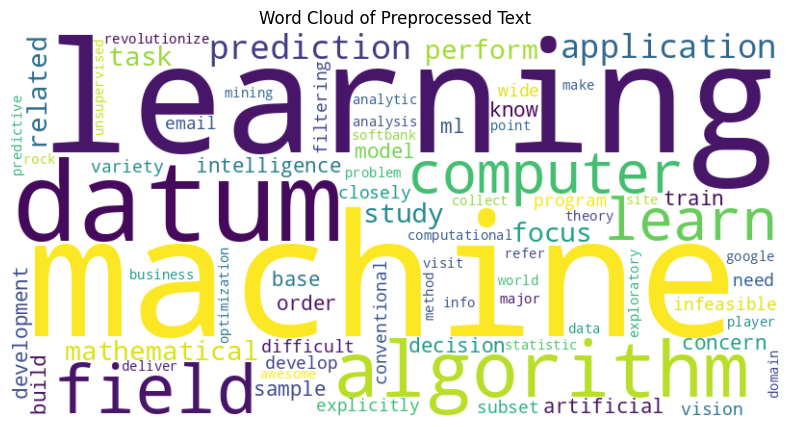

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the lemmatized tokens after stop word removal for the word cloud
# Join the list of tokens back into a single string

wordcloud_text = " ".join(spacy_lemmatized_tokens) # Using spaCy lemmatized tokens

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Preprocessed Text")
plt.show()